Estimated propagator for a free particle from x0=0.0 to xN=1.0 in time T=1.0: 8.257244046555829e-18


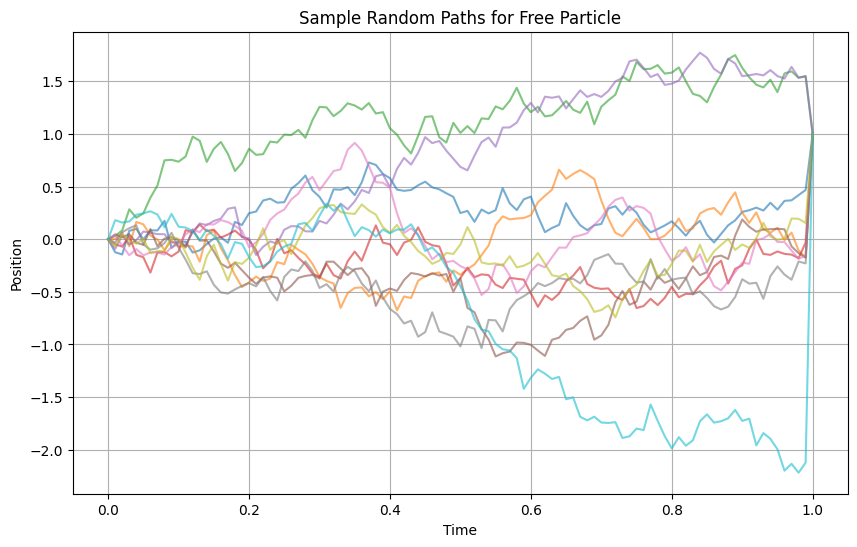

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
m = 1.0          # mass of the particle
hbar = 1.0       # reduced Planck's constant
T = 1.0          # total time
N = 100          # number of time slices
x0 = 0.0         # initial position
xN = 1.0         # final position
num_paths = 1000 # number of random paths to simulate

dt = T / N       # time step

# Generate random paths
paths = []
for _ in range(num_paths):
    path = np.zeros(N + 1)
    path[0] = x0
    path[-1] = xN
    for i in range(1, N):
        path[i] = path[i-1] + np.random.normal(0, np.sqrt(dt))
    paths.append(path)

# Compute the action for each path and the propagator
def action(path):
    S = 0.0
    for i in range(N):
        dx = path[i+1] - path[i]
        S += 0.5 * m * (dx**2) / dt
    return S

propagator = 0.0
for path in paths:
    S = action(path)
    propagator += np.exp(-S / hbar)  # Euclidean version

propagator /= num_paths

# Display results
print(f"Estimated propagator for a free particle from x0={x0} to xN={xN} in time T={T}: {propagator}")

# Plot a few sample paths
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.plot(np.linspace(0, T, N + 1), paths[i], alpha=0.6)
plt.title("Sample Random Paths for Free Particle")
plt.xlabel("Time")
plt.ylabel("Position")
plt.grid(True)
plt.show()

In [ ]:
paths[1]

(101,)

Using the parameters from the simulation the propagator is 0.24197.

The discrepancy is due to:



*   Using Euclidean time but still computing the action as if in real time.
*   The simulation uses a naive random walk which doesn't correctly sample the path space with the correct weighting.
*   The exponential suppression from large actions in random paths.

